In [35]:
%jsroot off

In [1]:
void format_line(TAttLine* line,int col,int sty){
line->SetLineWidth(5); line->SetLineColor(col);
line->SetLineStyle(sty);}

### Функция Брейта-Вигнера:
$$\sigma(E; \Gamma, M, A) = A \dfrac{(\Gamma/4)^2}{(E - M)^2 + (\Gamma/2)^2}$$
Обращением функции распределения получается функция:
$$E = M + \dfrac{\Gamma}{2} tg(\dfrac{8u}{\Gamma A} - \dfrac{\pi}{2})$$, где u ~ U(0, 1)

In [2]:
// density
double the_breit_wigner(double* vars, double* pars)
{
    return pars[2] * pow(pars[0]/4,2) / (pow(vars[0] - pars[1],2) + pow(pars[0]/2,2));
}

In [3]:
// inverse function
double the_inv_bw(double* vars, double* pars)
{
    return pars[1] + pars[0]/2 * std::tan(8 * vars[0]/pars[0]/pars[2]- M_PI/2);
}

In [4]:
auto canvas = new TCanvas("canvas","canvas");
gStyle->SetOptTitle(0); gStyle->SetOptStat(0);
gStyle->SetOptFit(1111); gStyle->SetStatBorderSize(0);
gStyle->SetStatX(.89); gStyle->SetStatY(.89);

In [5]:
// initial parameters
double G = 0.02; // GeV
double M = 0.497; // GeV
double A = 1;
double rbound = M * 2;
TF1 breit_wigner("breit_wigner", the_breit_wigner, 0, rbound, 3);
TF1 inv_bw("inv_bw", the_inv_bw, 0, rbound, 3);
breit_wigner.SetParameters(G, M, A);
inv_bw.SetParameters(G, M, A);
breit_wigner.SetParNames("G", "M", "A");
inv_bw.SetParNames("G", "M", "A");

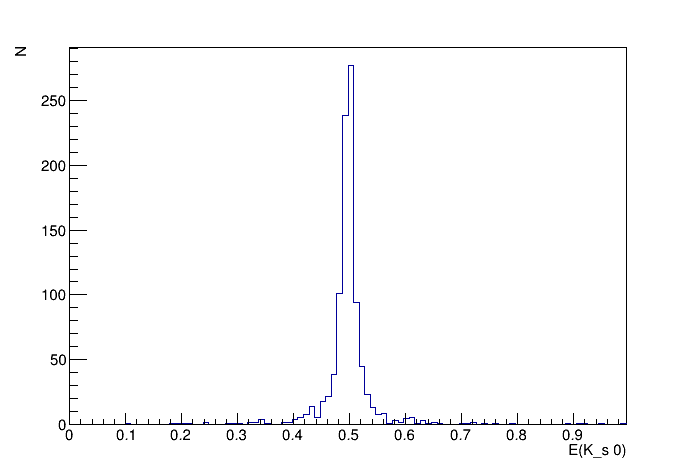

In [6]:
TH1F hist("hist", "Title", 100, -0, rbound);
hist.SetTitle("Histogram title; E(K_s 0); N");

hist.SetMarkerStyle(8);

TRandom rnd;

for (auto i = 1; i < 1000; i++) 
{
    double u = rnd.Rndm();
    double sample = inv_bw(u);
    hist.Fill(inv_bw(u));
}
hist.Draw();
canvas->SetTitle("title");
canvas->Draw();

In [7]:
auto fitResPtr = hist.Fit(&breit_wigner, "S");

 FCN=48.6088 FROM MIGRAD    STATUS=CONVERGED     375 CALLS         376 TOTAL
                     EDM=6.05042e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  G            1.82604e-02   9.31162e-04   1.71898e-06   3.88591e-01
   2  M            4.97419e-01   3.91004e-04   1.34041e-06  -4.56310e-01
   3  A            1.34492e+03   8.17749e+01   1.51161e-01   1.19206e-06


In [8]:
fitResPtr->Print();


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      48.6088
NDf                       =           50
Edm                       =  6.05042e-08
NCalls                    =          376
G                         =    0.0182604   +/-   0.000931162 
M                         =     0.497419   +/-   0.000391004 
A                         =      1344.92   +/-   81.7749     


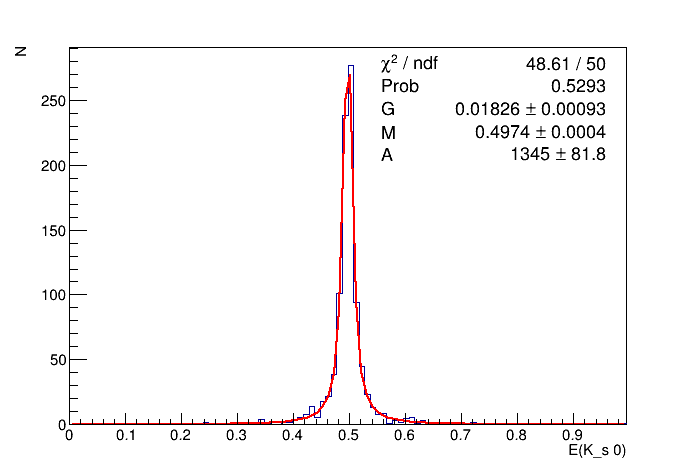

In [9]:
hist.Draw();
canvas->Draw();